In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#read data
#df = pd.read_csv('csvData/articledataDBmerged.csv',  skip_blank_lines=True, skiprows=0, index_col=0)
df = pd.read_csv("csvData/articledataDBmerged4.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
#df = pd.read_csv("git_SeparationJackson/dfwithkhdelta.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
#df = pd.read_csv('csvData/articledataDBextCalcD.dat',  skip_blank_lines=True, skiprows=0)
#df = pd.read_csv('csvData/articledataDBmerged.csv',  skip_blank_lines=True, skiprows=0,  index_col=0)
#df = pd.read_csv('csvData/ModelDBentryTrim.csv', index_col=0, skip_blank_lines=True, skiprows=1)
df

,cid,cid_PM,cid_solvent,cid_acid,CextratantEq (M),ExtractantName,Cextractant (M),AverageAggregateSize (A),Nextractantmol,ExtractantMonomer (%),...,Rotatable bond count_acid,H bond donor count_acid,H bond acceptor count_acid,Charge_acid,Covalent Unit count_acid,TPSA_acid,Wiener_acid,Branching Index_acid,Polarity Index_acid,Heterogeneity Index_acid
0,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
1,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
2,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
3,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
4,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8161,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.02,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8162,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.08,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8163,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.06,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8164,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.04,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708


In [40]:
#df=df.loc[df['ExtractantName']=='TODGA']

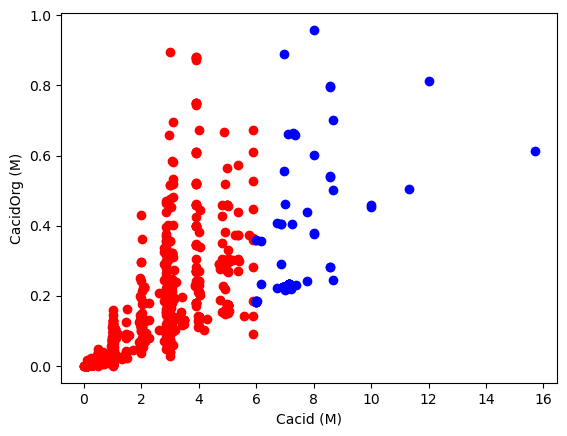

In [41]:
dfT = df[df['CacidOrg (M)'].isna() == False]
nodeField = 'Cacid (M)'
threshold= 6
node1 = dfT[dfT[nodeField] < threshold][[nodeField,'CacidOrg (M)']]
node2 = dfT[dfT[nodeField] > threshold][[nodeField,'CacidOrg (M)']]

plt.xlabel(nodeField)
plt.ylabel('CacidOrg (M)')
plt.scatter(node1[nodeField],node1['CacidOrg (M)'], color='red')
plt.scatter(node2[nodeField],node2['CacidOrg (M)'], color='blue')
plt.show()


#entropyN1 = np.sum( node1['CacidOrg (M)']*np.log(node1['CacidOrg (M)']))


In [42]:
#calculate log of some fields..
def logDion(row):
    Dion = row['D(ion)']
    if (Dion>0) :
        return np.log10(Dion)

def logAcid(row):
    HNO3ini = row['Cacid (M)']
    if (HNO3ini>0) :
        return np.log10(HNO3ini)

def logAcidOrg(row):
    HNO3org = row['CacidOrg (M)']
    if (HNO3org>0) :
        return np.log10(HNO3org)

##Calculates the D values if the Extraction is known...
def logExtractant(row):
    Extractantini = row['Cextractant (M)']
    if (Extractantini > 0) :
        return np.log10(Extractantini)


df['logAcid'] = df.apply(logAcid, axis=1)
df['logAcidOrg'] = df.apply(logAcidOrg, axis=1)
df['logDion'] = df.apply(logDion, axis=1)
df['logExtractant'] = df.apply(logExtractant, axis=1)

C:\Users\lucil\AppData\Local\Temp\ipykernel_11184\2849232530.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logAcid'] = df.apply(logAcid, axis=1)
C:\Users\lucil\AppData\Local\Temp\ipykernel_11184\2849232530.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logAcidOrg'] = df.apply(logAcidOrg, axis=1)
C:\Users\lucil\AppData\Local\Temp\ipykernel_11184\2849232530.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [43]:
#encoding for the cathegorical variable ion name.
from sklearn.preprocessing import LabelEncoder

# Create and fit the encoder
encoder = LabelEncoder()
df['IonName_encoded'] = encoder.fit_transform(df['IonName'])


C:\Users\lucil\AppData\Local\Temp\ipykernel_11184\2368580938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IonName_encoded'] = encoder.fit_transform(df['IonName'])


In [44]:
df[['IonName','IonName_encoded']]

,IonName,IonName_encoded
0,NaN,60
1,Nd,29
2,Nd,29
3,Nd,29
4,Nd,29
...,...,...
8161,Ce,9
8162,Y,55
8163,Y,55
8164,Y,55


## Now we should find the important collumns that we are going to use

### the prediction will for: log D values


In [45]:
#fields that are going to be the input
#there are pre-set to test, use inputFields, yfield to set the desired calculation
i1 = ['Cextractant (M)','Cacid (M)']
i2 = ['Cextractant (M)','Cacid (M)', 'XlogP']
i3 = ['Cextractant (M)','Cacid (M)', 'XlogP', 'Polarity Index']
i4 = ['Cextractant (M)','Cacid (M)', 'Cpm (M)']

i27= ['Cextractant (M)', 'Cacid (M)', 'Cpm (M)','XlogP','H bond acceptor count', 'Polarity Index', 'Heterogeneity Index', 'Branching Index']

t1 = ['Cextractant (M)','Cacid (M)']
t2 = ['Cextractant (M)','Cacid (M)', 'XlogP']
t3 = ['Cextractant (M)','Cacid (M)', 'Polarity Index']
t4 = ['Cextractant (M)','Cacid (M)', 'Branching Index']
t5 = ['Cextractant (M)','Cacid (M)', 'Heterogeneity Index']
t6 = ['Cextractant (M)','Cacid (M)', 'Wiener']
t7 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener']#, 'Kh', 'DeltaG (kJ/mol)']
t8 = ['logExtractant','logAcid','XlogP', 'Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener'
     ,'IonName_encoded', 'Polarity Index_acid', 'Branching Index_acid', 'Heterogeneity Index_acid', 'Wiener_acid']


o1 = ['CacidOrg (M)']
o2 = ['CionOrg (M)']
o3 = ['D(acid)']
o4 = ['D(ion)']
o5 = ['Rg']
o6 = ['ExtractantMonomer (%)']
o7 = ['AverageAggregateSize (A)']
o8 = ['logDion']

inputField = t8
outputFields = o8

In [46]:

#extra condition to separate the database
dfSize=df[ (df['has PM?'] == 0) & (df['Third phase'] == 0)]
#dfSize = df

#Cleaning the null and NaN fields
feature = dfSize[inputField+outputFields].copy()
feature = feature.dropna()
feature = feature.drop_duplicates()
feature = feature.reset_index(drop=True)  ## this line is important, otherwise the indexes will be wierd
feature

,logExtractant,logAcid,XlogP,Polarity Index,Branching Index,Heterogeneity Index,Wiener,IonName_encoded,Polarity Index_acid,Branching Index_acid,Heterogeneity Index_acid,Wiener_acid,logDion
0,-1.397940,0.000000,12.8,3.722409,120.0,8.416,7660.0,25,4.707928,0.0,1.015,9.0,-0.600326
1,-1.397940,0.000000,12.8,3.722409,120.0,8.416,7660.0,9,4.707928,0.0,1.015,9.0,-0.485452
2,-1.397940,0.000000,12.8,3.722409,120.0,8.416,7660.0,35,4.707928,0.0,1.015,9.0,-0.122629
3,-1.397940,0.000000,12.8,3.722409,120.0,8.416,7660.0,29,4.707928,0.0,1.015,9.0,0.066699
4,-1.397940,0.000000,12.8,3.722409,120.0,8.416,7660.0,40,4.707928,0.0,1.015,9.0,0.668013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,-1.698970,0.778151,12.8,3.722409,120.0,8.416,7660.0,9,5.160458,0.0,2.708,16.0,1.249565
1293,-1.096910,0.778151,12.8,3.722409,120.0,8.416,7660.0,55,5.160458,0.0,2.708,16.0,2.162445
1294,-1.221849,0.778151,12.8,3.722409,120.0,8.416,7660.0,55,5.160458,0.0,2.708,16.0,2.087842
1295,-1.397940,0.778151,12.8,3.722409,120.0,8.416,7660.0,55,5.160458,0.0,2.708,16.0,2.080937


## Decision tree classifier/prediction?

In [47]:
#define the category values
y = feature[outputFields].values
y

feature = feature.drop(outputFields, axis=1)
feature_list = list(feature.columns)
#feature_list
X = np.array(feature)
#X[0:5,::]


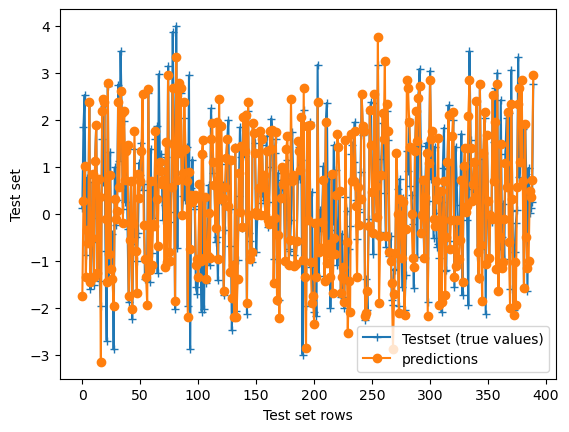

DecisionTrees's R2:  0.6359584678350308
Root mean square error: 0.8697384236011889
Mean Absolute Error: 0.02457228084623138 M


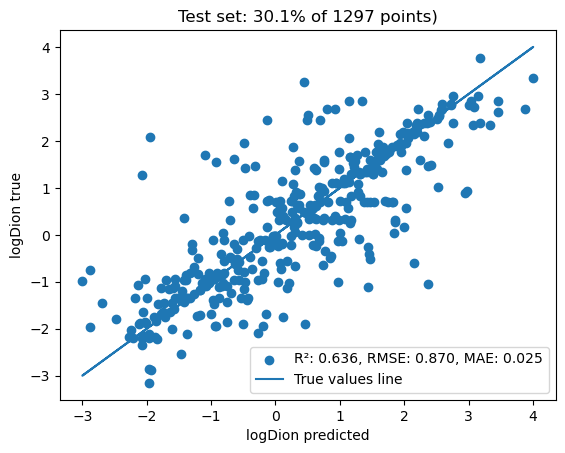

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


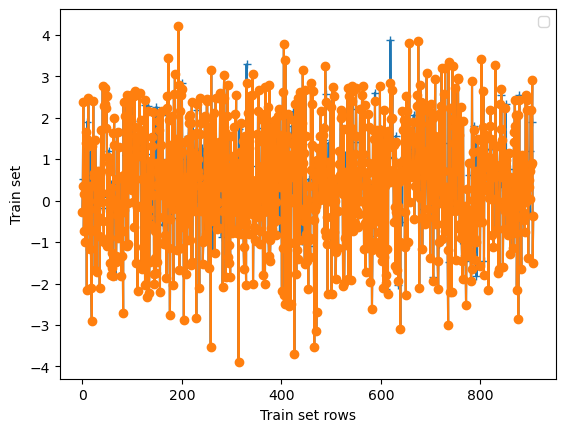

DecisionTrees's R2:  0.9732620035001328
Root mean square error: 0.24100185129040122
Mean Absolute Error: 1.1055683551222068e-18 M


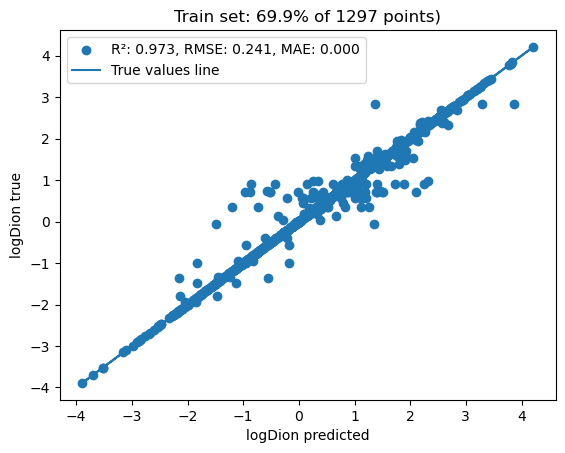

In [50]:
#split the data set
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.30, random_state=3)
#create the classifier
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as tree
from sklearn import metrics

myTree = DecisionTreeRegressor(max_depth=16) #use 2^max_depth = number of possible branches...
myTree # it shows the default parameters

#fit the train set...
myTree.fit(X_trainset,y_trainset)
#now that it is trained we can make some predictions
predTree = myTree.predict(X_testset)
predictionsTrain = myTree.predict(X_trainset)
#print (predTree[0:10])
#print (y_testset[0:10])

plt.xlabel("Test set rows")
plt.ylabel("Test set")
plt.plot(y_testset, marker='+', label='Testset (true values)')
plt.plot(predTree, marker = 'o', label='predictions')
plt.legend()
plt.show()

r2 = metrics.r2_score(y_testset,predTree)
rmse = np.sqrt(metrics.mean_squared_error(y_testset, predTree))
mae = np.abs(np.mean(y_testset-predTree))
#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", r2)
print("Root mean square error:", rmse)
print('Mean Absolute Error:',mae , 'M')

plt.scatter(y_testset, predTree, label=f"R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")
plt.xlabel(f"{outputFields[0]} predicted")
plt.ylabel(f"{outputFields[0]} true")
plt.title('Model Performance')
plt.plot(y_testset, y_testset, label='True values line')
plt.title('Test set: '+f"{100*len(y_testset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')
plt.legend()
plt.show()
#_______tranning information
plt.xlabel("Train set rows")
plt.ylabel("Train set")
plt.plot(y_trainset, marker='+')
plt.plot(predictionsTrain, marker = 'o')
plt.legend()
plt.show()

r2 = metrics.r2_score(y_trainset,predictionsTrain)
rmse = np.sqrt(metrics.mean_squared_error(y_trainset, predictionsTrain))
mae = np.abs(np.mean(y_trainset-predictionsTrain))
#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", r2)
print("Root mean square error:", rmse)
print('Mean Absolute Error:',mae , 'M')

plt.xlabel(f"{outputFields[0]} predicted")
plt.ylabel(f"{outputFields[0]} true")
plt.scatter(y_trainset, predictionsTrain, label=f"R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")
plt.plot(y_trainset, y_trainset, label='True values line')
plt.title('Train set: '+f"{100*len(y_trainset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')
plt.legend()
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


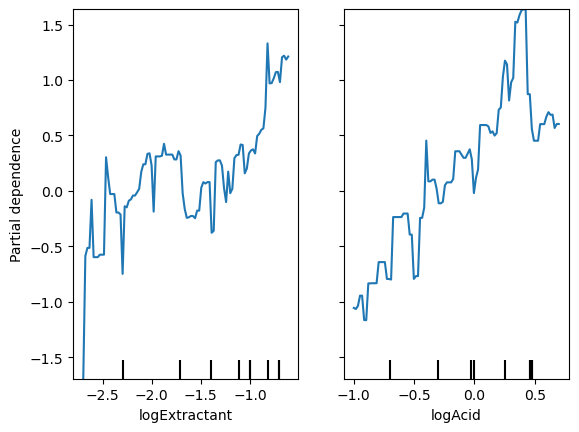

In [64]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(myTree, X, features=[0, 1], feature_names=feature_list)
plt.show()

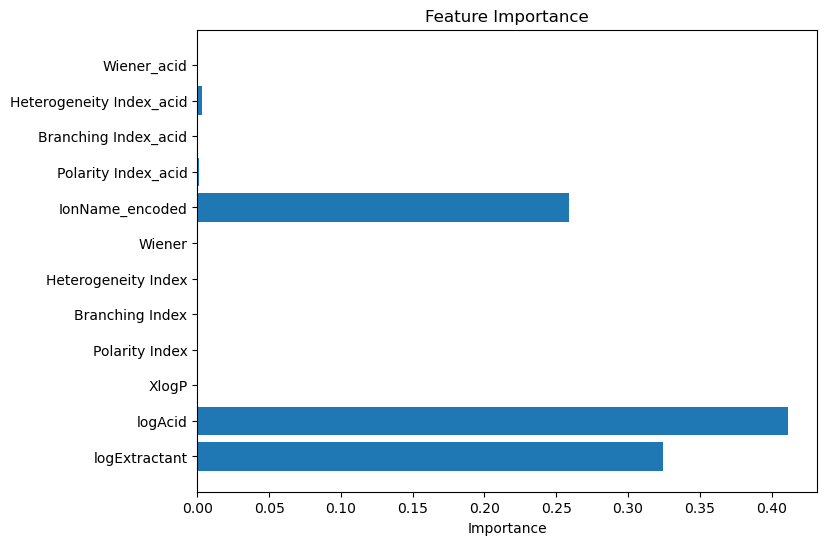

In [60]:
import matplotlib.pyplot as plt

# Assuming tree_model is the trained model
importances = myTree.feature_importances_


# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_list, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [65]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

sample = X[0].reshape(1, -1)
decision_path = myTree.decision_path(sample)

# Get the nodes involved in the decision
node_indices = decision_path.indices

print("Decision path:")
for node_id in node_indices:
    print(f"Node {node_id}: {myTree.tree_.feature[node_id]}")


Decision path:
Node 0: 1
Node 184: 0
Node 524: 1
Node 738: 0
Node 739: 7
Node 740: 1
Node 741: 0
Node 757: 0
Node 758: 1
Node 759: 0
Node 760: 0
Node 761: 8
Node 762: 0
Node 763: 7
Node 771: -2


> I can get 0.88/0.94 for CacidOrg, based on i14 o1, for data with no PM...

In [61]:
#Look what are the experimental configuration of the points that deviate a lot.
dfDeviation = pd.DataFrame( X_testset[(y_testset-predTree)>0.05] , columns= feature_list)
dfDeviation.sort_values(by=['Cextractant (M)','Cacid (M)'])

IndexError: boolean index did not match indexed array along dimension 1; dimension is 12 but corresponding boolean dimension is 390

In [52]:
#Look what are the experimental configuration of the points that deviate a lot.
#lista =  feature_list+list([y])+list(['ypred','error'])
#reconstructedPrediction = pd.DataFrame([X_test,y_test, ypred], columns=lista)
#reconstructedPrediction = pd.DataFrame(data=np.column_stack((X_testset, y_testset, predTree, y_testset-predTree)), columns=lista)
#reconstructedPrediction

In [10]:
text_representation = tree.export_text(myTree)
#print(text_representation)
##recover original names of variables...
tnew = text_representation  #.replace("feature_0","has Acid?")

#names = ['ExtractantName', 'SolventName', 'AcidName',
#       'has acid?', 'Cacid (M)', 'CacidOrg (M)', 'ExtractionFactor',
#       'has ions?', 'xlogp', 'molecular_weight', 'h_bond_donor_count']

print(feature_list)

for i,name in enumerate(feature_list):
    tnew = tnew.replace('feature_'+str(i), name)

print(tnew)
outputTree = open('tree.dat','w+')
outputTree.write(tnew)
outputTree.close()


['Cextractant (M)', 'Cacid (M)', 'XlogP', 'Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener']
|--- Cacid (M) <= 2.97
|   |--- Cacid (M) <= 1.95
|   |   |--- Cacid (M) <= 0.74
|   |   |   |--- Cacid (M) <= 0.47
|   |   |   |   |--- Branching Index <= 126.00
|   |   |   |   |   |--- Cextractant (M) <= 0.15
|   |   |   |   |   |   |--- Cacid (M) <= 0.16
|   |   |   |   |   |   |   |--- Cacid (M) <= 0.10
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- Cacid (M) >  0.10
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- Cacid (M) >  0.16
|   |   |   |   |   |   |   |--- Cacid (M) <= 0.21
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- Cacid (M) >  0.21
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- Cextractant (M) >  0.15
|   |   |   |   |   |   |--- Cextractant (M) <= 0.25
|   |   |   |   |   |   |   |--- Cacid (M) <= 0.09
|   |   |   |   |   |

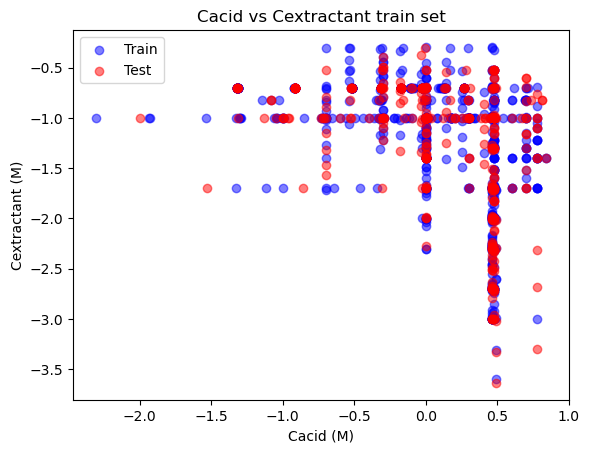

In [53]:
plt.title('Cacid vs Cextractant train set')
plt.xlabel('Cacid (M)')
plt.ylabel('Cextractant (M)')
plt.scatter(X_trainset[:,1] ,X_trainset[:,0] , color='blue' , alpha=0.5, label='Train')
plt.scatter(X_testset[:, 1], X_testset[:, 0], color ='red', alpha=0.5, label='Test')
plt.legend()

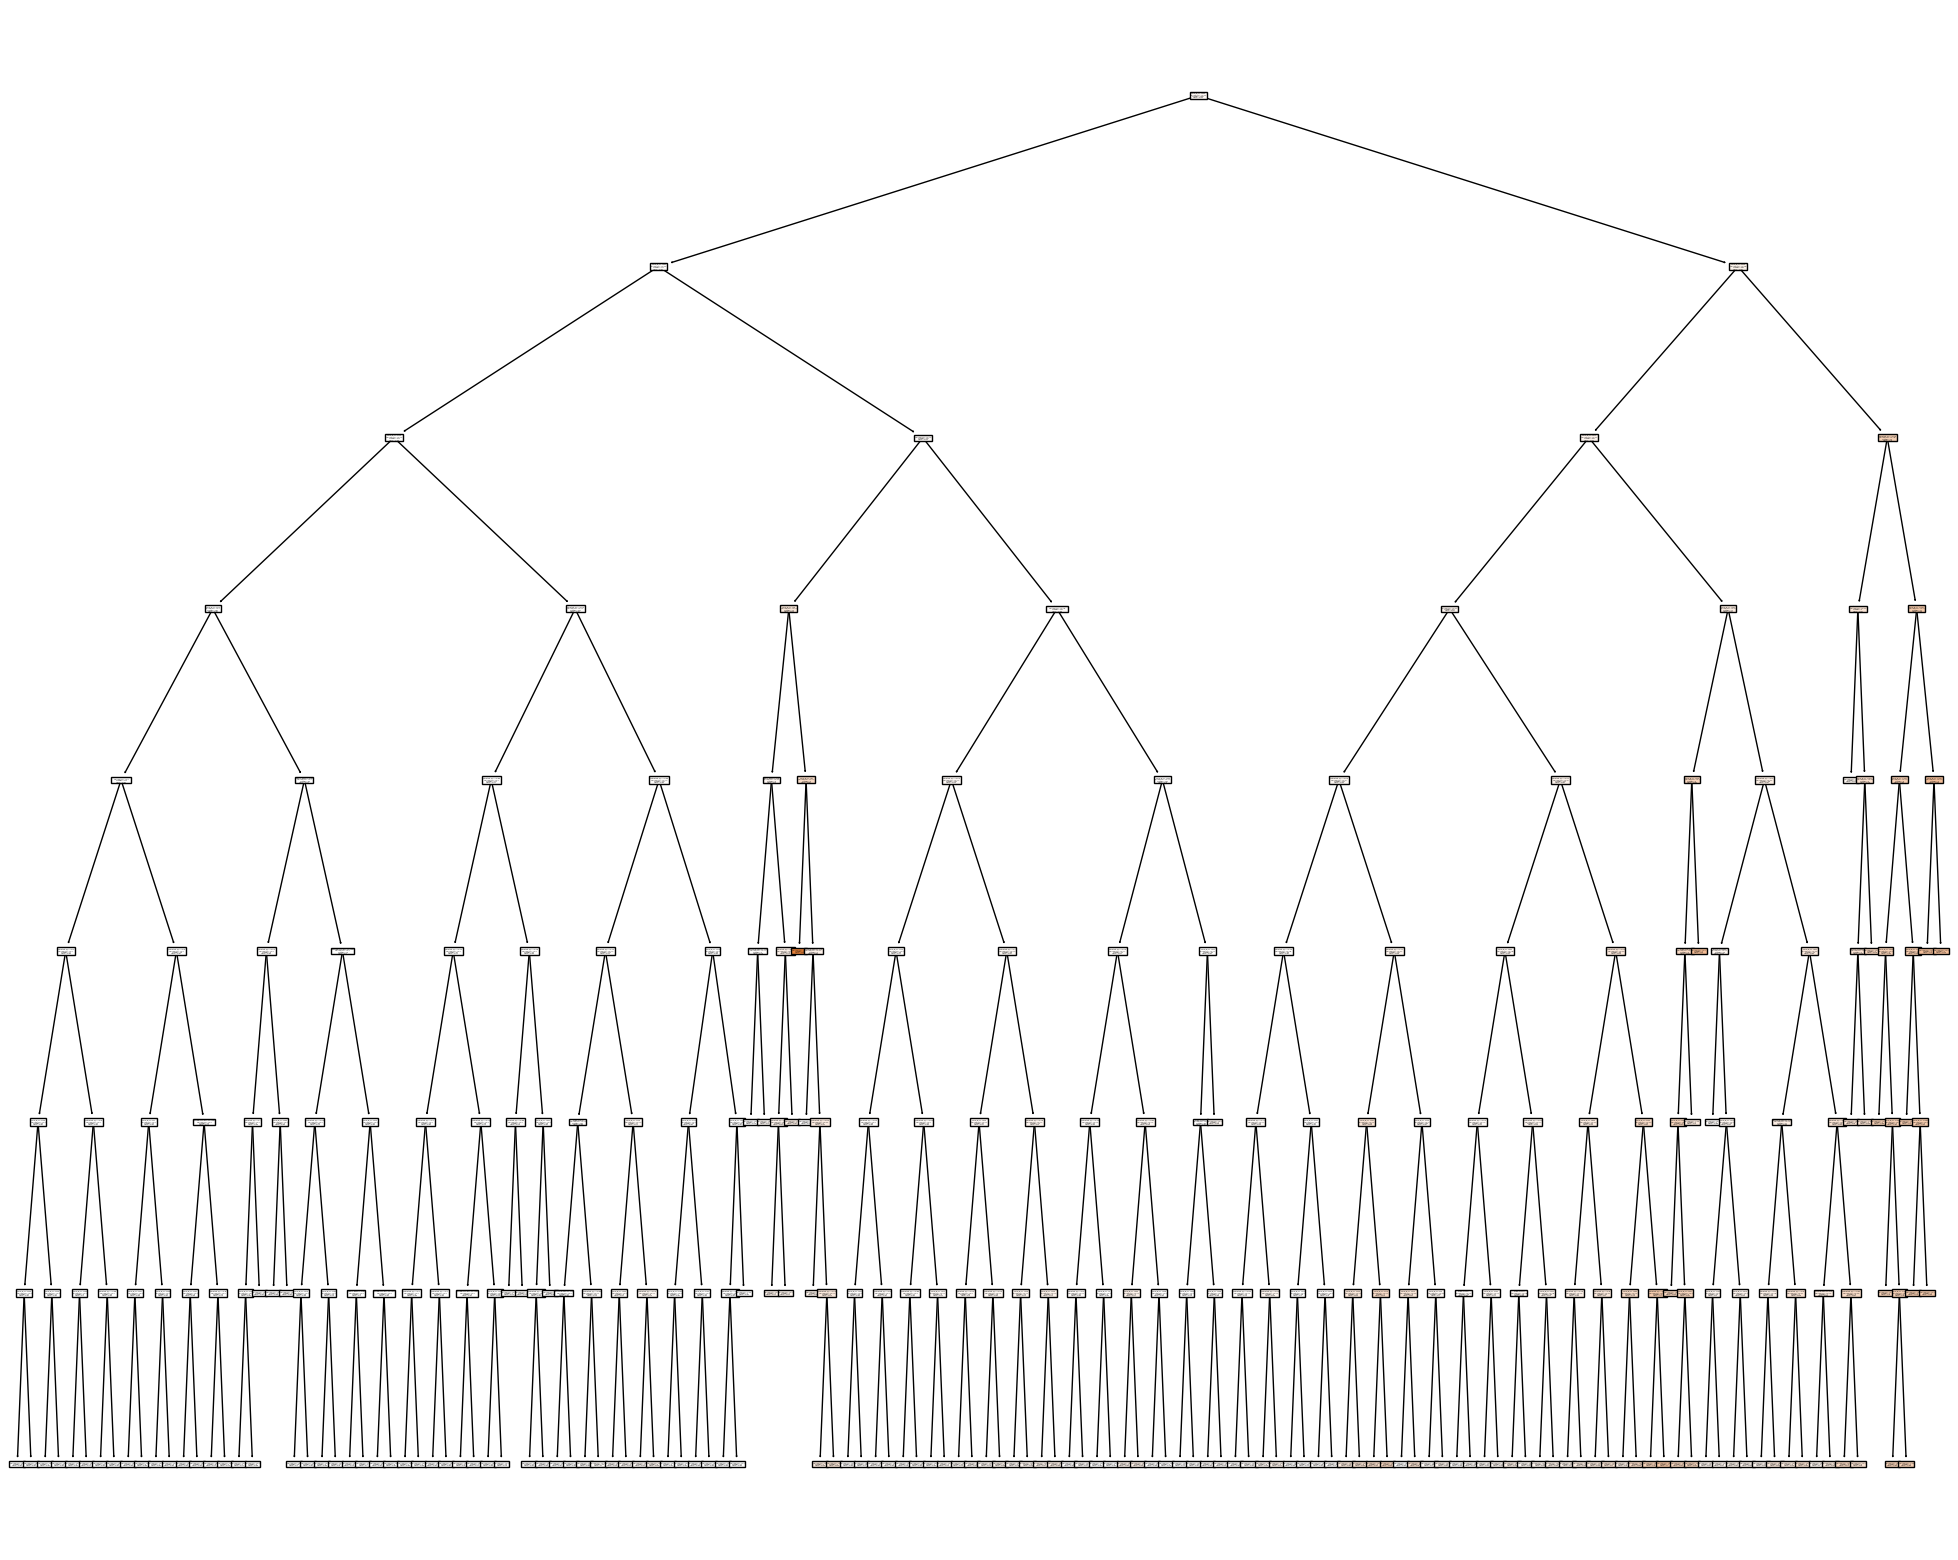

In [12]:
#%matplotlib inline

#fnames=['ExtractantName', 'SolventName', 'AcidName', 'AverageAggregateSize (A)',
#       'has acid?', 'Cacid (M)', 'has ions?', 'xlogp', 'molecular_weight',
#       'h_bond_donor_count']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(myTree,
                   feature_names= feature_list,
                   class_names= ['Third phase', 'Biphasic'] ,
                   filled=True)
#fig.savefig("0decistion_tree.png")
#plot.show()

___
# RANDOM FOREST
___

In [54]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
#1000 42 give awesome results
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_trainset, y_trainset)

C:\Users\lucil\AppData\Local\Temp\ipykernel_11184\2114910647.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainset, y_trainset)


RandomForestRegressor(n_estimators=1000, random_state=42)

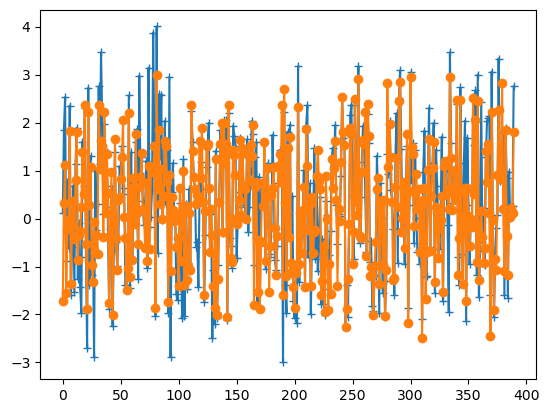

DecisionTrees's R2:  0.7105973156906218
Root mean square error: 0.77546904719254
Mean Absolute Error: 0.038975218089028776 M


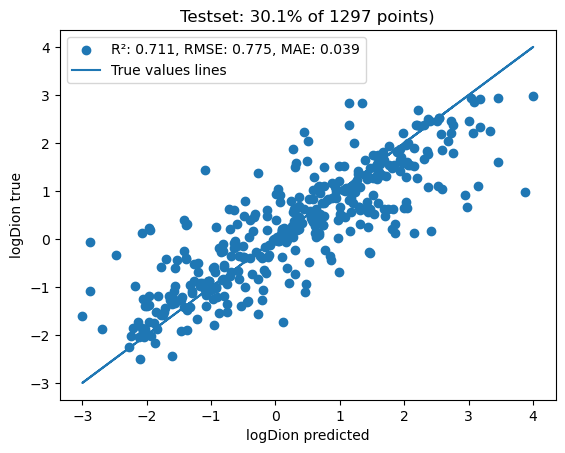

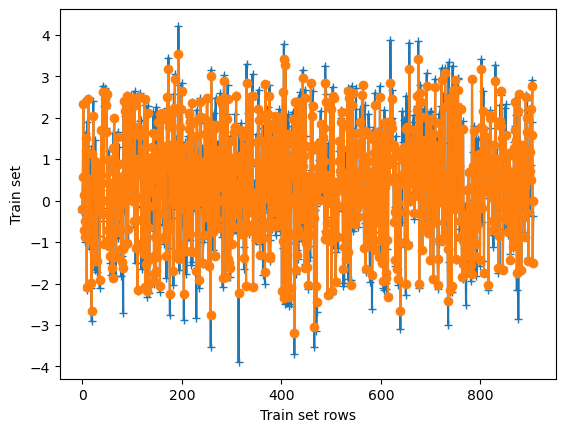

DecisionTrees's R2:  0.9452973489217669
Root mean square error: 0.34471496265922963
Mean Absolute Error: 0.0016559521884274876 M


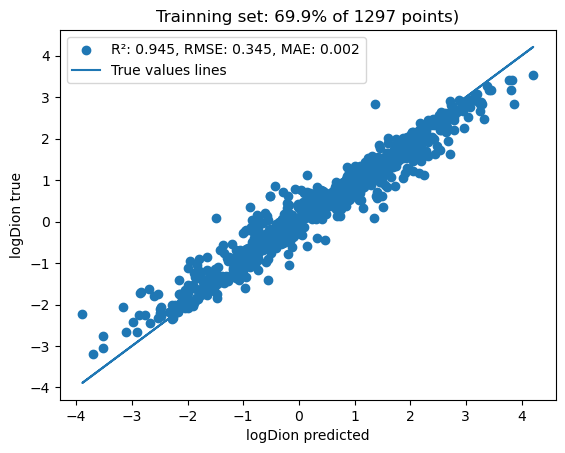

In [55]:
# Use the forest's predict method on the train and test data
predictionsTrain = rf.predict(X_trainset)
predictions = rf.predict(X_testset)
# Calculate the absolute errors
errors = abs(predictions - y_testset)

plt.plot(y_testset, marker='+')
plt.plot(predictions, marker = 'o')
plt.show()

r2 = metrics.r2_score(y_testset,predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_testset, predictions))
mae = np.abs(np.mean(y_testset-predictions))

#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", r2)
print("Root mean square error:", rmse)
print('Mean Absolute Error:',mae , 'M')
plt.xlabel(f"{outputFields[0]} predicted")
plt.ylabel(f"{outputFields[0]} true")
plt.scatter(y_testset, predictions, label=f"R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")
plt.plot(y_testset, y_testset, label='True values lines')
plt.title('Testset: '+f"{100*len(y_testset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')
plt.legend()
plt.show()


#_____________________________

errors = abs(predictionsTrain - y_trainset)
plt.xlabel("Train set rows")
plt.ylabel("Train set")
plt.plot(y_trainset, marker='+')
plt.plot(predictionsTrain, marker = 'o')
plt.show()


r2 = metrics.r2_score(y_trainset,predictionsTrain)
rmse = np.sqrt(metrics.mean_squared_error(y_trainset, predictionsTrain))
mae = np.abs(np.mean(y_trainset-predictionsTrain))
#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", r2)
print("Root mean square error:", rmse)
print('Mean Absolute Error:',mae , 'M')

plt.xlabel(f"{outputFields[0]} predicted")
plt.ylabel(f"{outputFields[0]} true")
plt.scatter(y_trainset, predictionsTrain, label=f"R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")
plt.plot(y_trainset, y_trainset, label='True values lines')
plt.title('Trainning set: '+f"{100*len(y_trainset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')
plt.legend()
plt.show()


